# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

lat_lngs = zip(lats, lngs)



# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    print(lat_lng)
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

(-49.81242861880158, -88.25568694863449)
(7.6278886766891425, -108.81403903829423)
(-6.798969713443155, -133.36469509700976)
(-12.31350713055522, 20.664062644369494)
(10.784712251775163, -161.50326955002805)
(10.338960050088929, 25.812823630482452)
(31.99448666896965, -77.1313885172207)
(-85.64527364772718, -143.5588398985644)
(13.788537775505127, 10.644412429414247)
(37.9181983639425, -118.55354339940236)
(39.09522814015803, -89.52661596620146)
(55.642878070201846, 149.940808571481)
(-77.45732364764055, -135.31657555348158)
(-14.914842748452607, -37.433520308392914)
(32.55299811827975, 146.55878328218924)
(-25.591726194553157, -36.55380038701816)
(52.64989096896012, 103.84472673383483)
(-22.317440404104524, -83.53592927216043)
(84.73041508653223, -50.83523858753435)
(-80.14331363992935, 22.176530214746023)
(65.3486233894515, -69.58947906176095)
(57.18618291813957, 174.7300408680466)
(29.08408561930841, 67.35730699511215)
(-63.14855199309104, -90.10977427626622)
(-59.38491707643594, -1

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
print(cities)

['puerto natales', 'coahuayana de hidalgo', 'taiohae', 'leua', 'kailua-kona', 'gereida', 'long beach', 'waitangi', 'goure', 'mammoth lakes', 'hillsboro', 'magadan', 'adamstown', 'ilheus', 'hasaki', 'sao joao da barra', 'angarsk', 'minas de marcona', 'ilulissat', 'bredasdorp', 'iqaluit', 'anadyr', 'bhag', 'stanley', 'invercargill', 'tsaratanana', 'puerto ayora', 'edinburgh of the seven seas', 'huarmey', 'valley city', 'freetown', 'goundam', 'avarua', "st. john's", 'blackmans bay', 'bethel', 'punta arenas', 'albany', "hayma'", 'bousso', 'sanctuary point', 'mount pearl', 'nova sintra', 'inhambane', 'ust-nera', 'carnarvon', 'necochea', 'santa cruz', 'trondheim', 'talnakh', 'carmelo', 'papatowai', 'hithadhoo', 'hermanus', 'kasongo-lunda', 'vilyuchinsk', 'quellon', 'znamenskoye', 'port-aux-francais', 'abbadia san salvatore', 'colonia', 'dudinka', 'tura', 'bodo', 'micheweni', 'tazovsky', 'manismata', 'yellowknife', 'ushuaia', 'alotau', 'devinuwara', 'lompoc', 'longyearbyen', 'vorgashor', 'gen

In [4]:
variable_1 = 1
variable_2 = 99
print(variable_1 % variable_2)

1


In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0


    
    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))


   

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
       
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | coahuayana de hidalgo
Processing Record 3 of Set 1 | taiohae
City not found. Skipping...
Processing Record 4 of Set 1 | leua
Processing Record 5 of Set 1 | kailua-kona
Processing Record 6 of Set 1 | gereida
Processing Record 7 of Set 1 | long beach
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | goure
Processing Record 10 of Set 1 | mammoth lakes
Processing Record 11 of Set 1 | hillsboro
Processing Record 12 of Set 1 | magadan
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | ilheus
Processing Record 15 of Set 1 | hasaki
Processing Record 16 of Set 1 | sao joao da barra
Processing Record 17 of Set 1 | angarsk
Processing Record 18 of Set 1 | minas de marcona
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | bredasdorp
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of S

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,-2.86,91,100,0.31,CL,1720305742
1,coahuayana de hidalgo,18.7000,-103.6583,30.86,61,32,2.92,MX,1720305782
2,leua,48.2156,18.6071,19.08,60,0,2.11,SK,1720306275
3,kailua-kona,19.6406,-155.9956,26.82,76,44,0.89,US,1720306339
4,gereida,11.2811,25.1414,24.41,69,98,4.46,SD,1720306341


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-2.86,91,100,0.31,CL,1720305742
1,coahuayana de hidalgo,18.7000,-103.6583,30.86,61,32,2.92,MX,1720305782
2,leua,48.2156,18.6071,19.08,60,0,2.11,SK,1720306275
3,kailua-kona,19.6406,-155.9956,26.82,76,44,0.89,US,1720306339
4,gereida,11.2811,25.1414,24.41,69,98,4.46,SD,1720306341


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

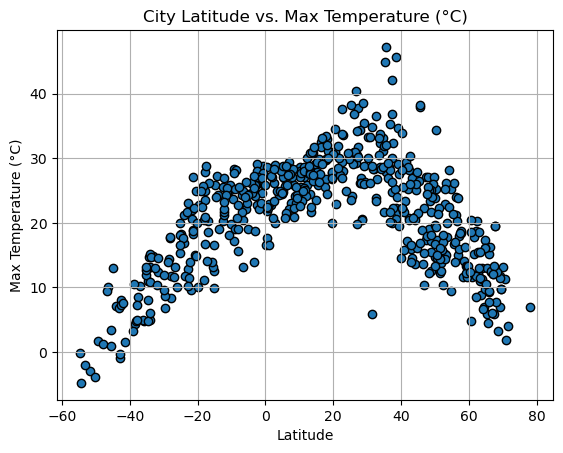

In [10]:


# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (°C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

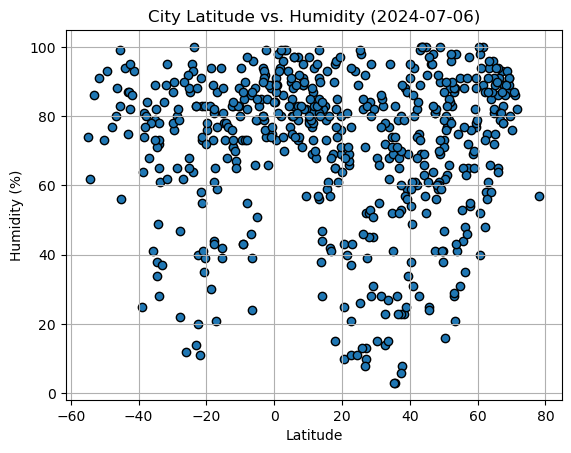

In [11]:
# Build the scatter plots for latitude vs. humidity

city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s')

# Get a representative date, for example, the date of the first record
representative_date = city_data_df['Date'].iloc[0].strftime('%Y-%m-%d')

# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({representative_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

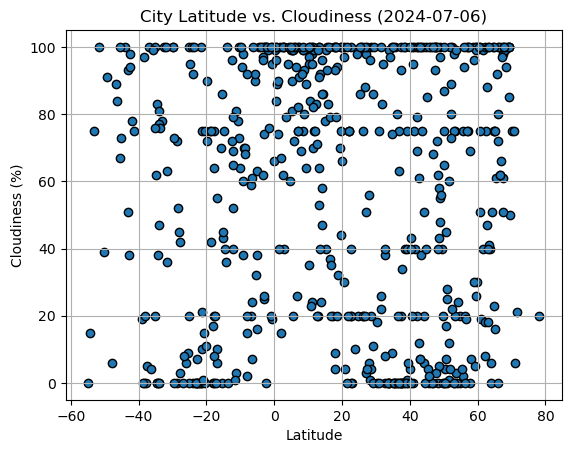

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({representative_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

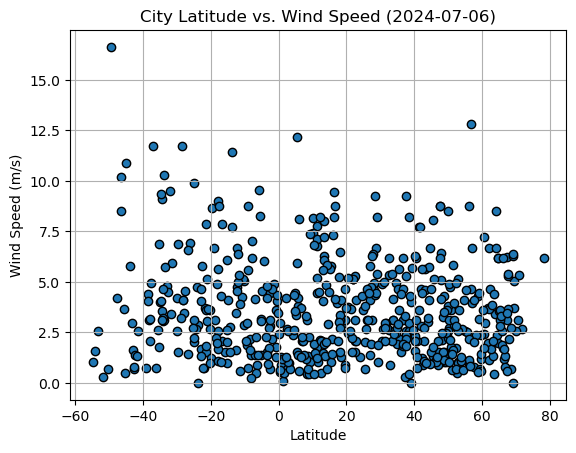

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({representative_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [26]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    

In [27]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,coahuayana de hidalgo,18.7000,-103.6583,30.86,61,32,2.92,MX,2024-07-06 22:43:02
2,leua,48.2156,18.6071,19.08,60,0,2.11,SK,2024-07-06 22:51:15
3,kailua-kona,19.6406,-155.9956,26.82,76,44,0.89,US,2024-07-06 22:52:19
4,gereida,11.2811,25.1414,24.41,69,98,4.46,SD,2024-07-06 22:52:21
5,long beach,33.7670,-118.1892,32.36,68,0,3.09,US,2024-07-06 22:49:38


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,-2.86,91,100,0.31,CL,2024-07-06 22:42:22
6,waitangi,-43.9535,-176.5597,7.12,94,100,5.81,NZ,2024-07-06 22:52:23
11,adamstown,-25.0660,-130.1015,20.04,68,100,9.89,PN,2024-07-06 22:52:28
12,ilheus,-14.7889,-39.0494,25.90,78,75,4.12,BR,2024-07-06 22:51:08
14,sao joao da barra,-21.6403,-41.0511,22.05,91,0,3.73,BR,2024-07-06 22:43:47


###  Temperature vs. Latitude Linear Regression Plot

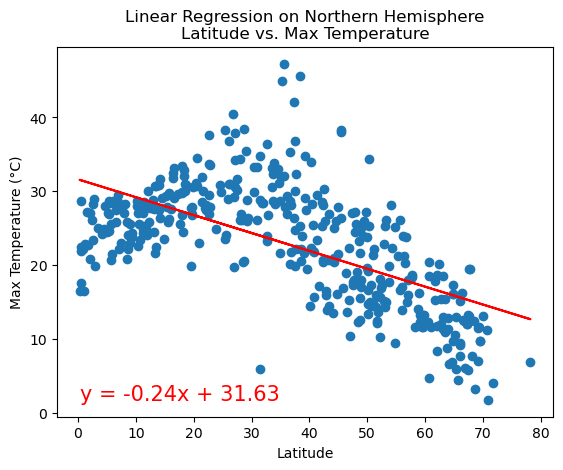

In [29]:
# Linear regression on Northern Hemisphere
# Import linregress from scipy.stats
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(x_values), min(y_values)), fontsize=15, color="red")
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
 
    
    # Show plot
    plt.show()

# Define variables for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Plot Latitude vs. Temperature
plot_linear_regression(x_values, y_values, "Latitude", "Max Temperature (°C)", "Linear Regression on Northern Hemisphere\nLatitude vs. Max Temperature", "Northern_Lat_vs_Temp.png")


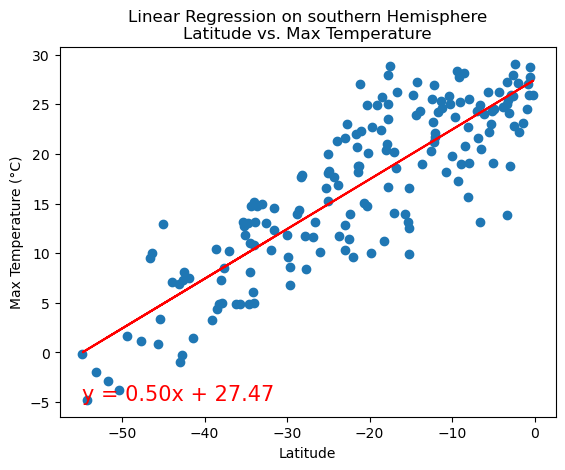

In [31]:
from scipy.stats import linregress
# Linear regression on Southern Hemisphere

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(x_values), min(y_values)), fontsize=15, color="red")
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
 
    
    # Show plot
    plt.show()

# Define variables for Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Plot Latitude vs. Temperature
plot_linear_regression(x_values, y_values, "Latitude", "Max Temperature (°C)", "Linear Regression on southern Hemisphere\nLatitude vs. Max Temperature", "southern_Lat_vs_Temp.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

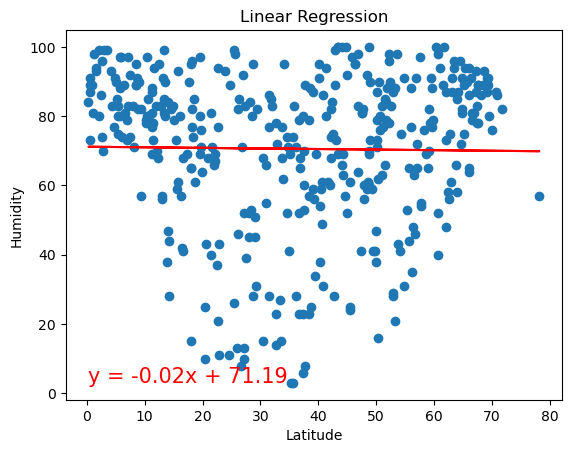

In [39]:
# Northern Hemisphere
# YOUR CODE HERE
from scipy.stats import linregress
# Linear regression on Southern Hemisphere

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(x_values), min(y_values)), fontsize=15, color="red")
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
 
    
    # Show plot
    plt.show()

# Define variables for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Plot Latitude vs. Temperature
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Linear Regression","northern_Lat_vs_Temp.png")


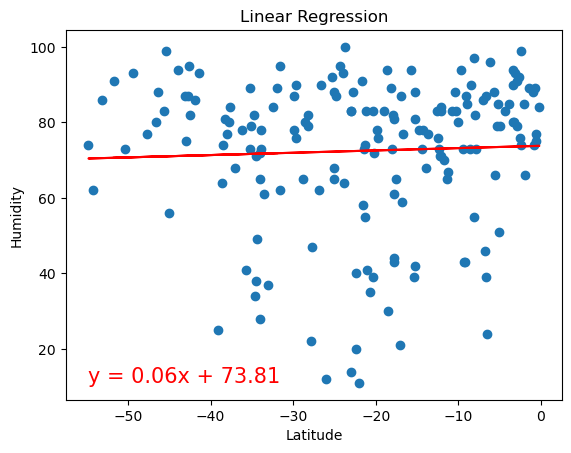

In [40]:
# Southern Hemisphere
# YOUR CODE HERE
# YOUR CODE HERE
from scipy.stats import linregress
# Linear regression on Southern Hemisphere

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(x_values), min(y_values)), fontsize=15, color="red")
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
 
    
    # Show plot
    plt.show()

# Define variables for Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Plot Latitude vs. Temperature
plot_linear_regression(x_values, y_values, "Latitude", "Humidity", "Linear Regression","southern_Lat_vs_Temp.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

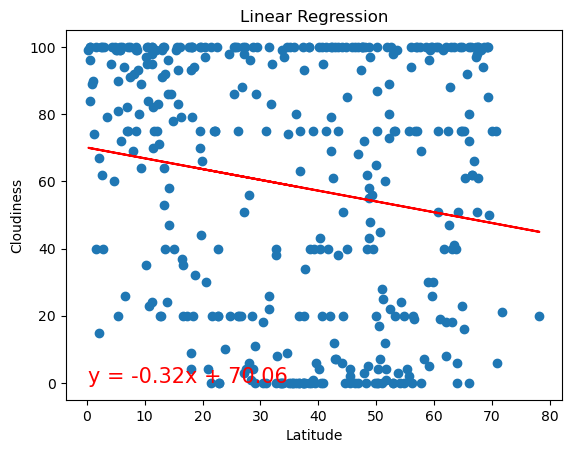

In [41]:
# Northern Hemisphere
from scipy.stats import linregress
# Linear regression on Southern Hemisphere

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(x_values), min(y_values)), fontsize=15, color="red")
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
 
    
    # Show plot
    plt.show()

# Define variables for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Plot Latitude vs. Temperature
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Linear Regression","southern_Lat_vs_Temp.png")


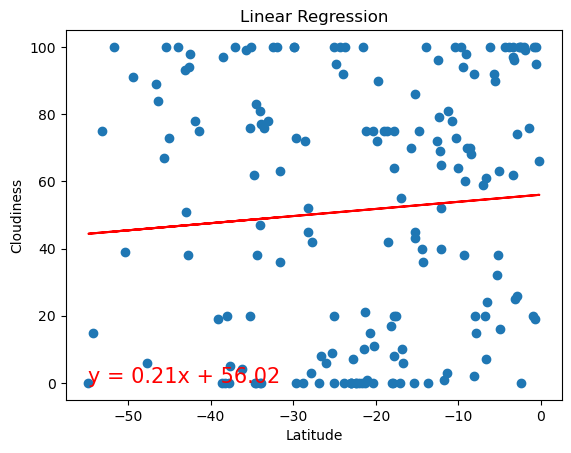

In [42]:
# Southern Hemisphere
from scipy.stats import linregress
# Linear regression on Southern Hemisphere

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(x_values), min(y_values)), fontsize=15, color="red")
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
 
    
    # Show plot
    plt.show()

# Define variables for Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Plot Latitude vs. Temperature
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Linear Regression","southern_Lat_vs_Temp.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

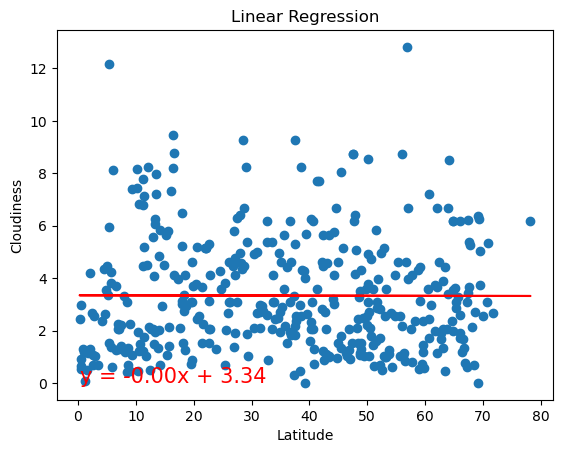

In [43]:
# Northern Hemisphere
# Northern Hemisphere
from scipy.stats import linregress
# Linear regression on Southern Hemisphere

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(x_values), min(y_values)), fontsize=15, color="red")
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
 
    
    # Show plot
    plt.show()

# Define variables for Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Plot Latitude vs. Temperature
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Linear Regression","southern_Lat_vs_wind.png")


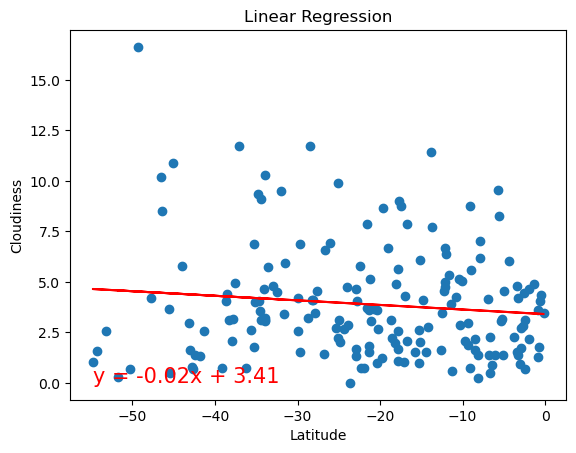

In [45]:
# Southern Hemisphere
from scipy.stats import linregress
# Linear regression on Southern Hemisphere

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, filename):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}", (min(x_values), min(y_values)), fontsize=15, color="red")
    
    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    
 
    
    # Show plot
    plt.show()

# Define variables for Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Plot Latitude vs. Temperature
plot_linear_regression(x_values, y_values, "Latitude", "Cloudiness", "Linear Regression","southern_Lat_vs_wind.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE